In [50]:
import numpy as np
from scipy.optimize import fmin_cg, minimize
from displayData import displayData
from nnCostFunction import nnCostFunction
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from checkNNGradients import checkNNGradients
from predict import predict
from sklearn.metrics import accuracy_score

# Machine Learning Course - Assignment 7: Neural Networks

 Instructions
 ------------

 This file contains code that helps you get started on the
 linear exercise. You will need to complete the following functions
 in this exericse:

    sigmoidGradient.py
    nnCostFunction.py
    predict.py

 For this exercise, you will not need to change any code in this file,
 or any other files other than those mentioned above.


## Initialization

In [28]:
## Setup the parameters you will use for this exercise
input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10  # 10 labels, from 1 to 10
# (note that we have mapped "0" to label 10)

## =========== Part 1: Loading and Visualizing Data =============
We start the exercise by first loading and visualizing the dataset.
You will be working with a dataset that contains handwritten digits.

Loading and Visualizing Data ...



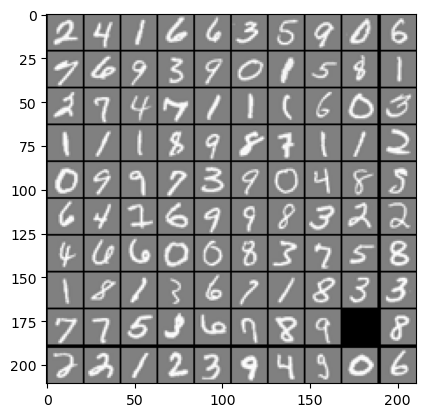

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.]])

In [29]:
# Load Training Data
print('Loading and Visualizing Data ...\n')

data = np.array([[float(x) for x in l.split(',')] for l in open('../data/dataset.csv', 'r').readlines()])
X = data[:, 0:-1]
y = data[:, -1]

m = X.shape[0]

# Randomly select 100 data points to display
sel = np.random.choice(m, 100, replace=False)

displayData(X[sel, :])

# input("Program paused. Press enter to continue.\n")
# print(X.shape)

## ================ Part 2: Loading Pameters ================
In this part of the exercise, we load some pre-initialized
neural network parameters.

In [30]:
print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
Theta1 = np.array([[float(x) for x in l.split(',')] for l in open('../data/sampleTheta1.csv', 'r').readlines()])
Theta2 = np.array([[float(x) for x in l.split(',')] for l in open('../data/sampleTheta2.csv', 'r').readlines()])

# Unroll parameters
nn_params = np.concatenate((Theta1.ravel(), Theta2.ravel()), axis=0)


Loading Saved Neural Network Parameters ...



## ================ Part 3: Compute Cost (Feedforward) ================
 To the neural network, you should first start by implementing the
 feedforward part of the neural network that returns the cost only. You
 should complete the code in nnCostFunction.py to return cost. After
 implementing the feedforward to compute the cost, you can verify that
 your implementation is correct by verifying that you get the same cost
 as us for the fixed debugging parameters.

 We suggest implementing the feedforward cost *without* regularization
 first so that it will be easier for you to debug. Later, in part 4, you
 will get to implement the regularized cost.

In [34]:
print('\nFeedforward Using Neural Network ...\n')

# Weight regularization parameter (we set this to 0 here).
lambda_par = 0

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)

print('Cost at parameters (loaded from sampleTheta1 and sampleTheta2):', J, '\n(this value should be about 0.287629)\n')

# input("Program paused. Press enter to continue.\n")


Feedforward Using Neural Network ...

Cost at parameters (loaded from sampleTheta1 and sampleTheta2): 0.2887197266302706 
(this value should be about 0.287629)



## =============== Part 4: Implement Regularization ===============
 Once your cost function implementation is correct, you should now
 continue to implement the regularization with the cost.

In [7]:
print('\nChecking Cost Function with Regularization ... \n')

# Weight regularization parameter (we set this to 1 here).
lambda_par = 1.

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)

print('Cost at parameters (loaded from sampleTheta1 and sampleTheta2):', J, '\n(this value should be about 0.383770)\n')

# input("Program paused. Press enter to continue.\n") J = (1/m) * np.sum(np.sum((-y)))


Checking Cost Function with Regularization ... 

Cost at parameters (loaded from sampleTheta1 and sampleTheta2): 0.38486042056224895 
(this value should be about 0.383770)



## ================ Part 5: Sigmoid Gradient  ================
 Before you start implementing the neural network, you will first
 implement the gradient for the sigmoid function. You should complete the
 code in the sigmoidGradient.py file.

In [35]:
def sigmoidGradient(z):
    #SIGMOIDGRADIENT returns the gradient of the sigmoid function
    #evaluated at z
    #   g = SIGMOIDGRADIENT(z) computes the gradient of the sigmoid function
    #   evaluated at z. This should work regardless if z is a matrix or a
    #   vector. In particular, if z is a vector or matrix, you should return
    #   the gradient for each element.

    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the gradient of the sigmoid function evaluated at
    #               each value of z (z can be a matrix, vector or scalar).
    s = sigmoid(z)
    g = s * (1 - s)

    # =============================================================

    return g

In [36]:
print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)
print('\n\n')

# input("Program paused. Press enter to continue.\n")


Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]





## ================ Part 6: Initializing Pameters ================
 In this part of the exercise, you will be starting to implment a two
 layer neural network that classifies digits. You will start by
 implementing a function to initialize the weights of the neural network
 (randInitializeWeights.py)

In [37]:
print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate((initial_Theta1.ravel(), initial_Theta2.ravel()), axis=0)


Initializing Neural Network Parameters ...



## =============== Part 7: Implement Backpropagation ===============
 Once your cost matches up with ours, you should proceed to implement the
 backpropagation algorithm for the neural network. You should add to the
 code you've written in nnCostFunction.py to return the partial
 derivatives of the parameters.

In [45]:
print('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()

# input("Program paused. Press enter to continue.\n")


Checking Backpropagation... 

[[ 1.11138118e-02  1.11138118e-02]
 [-1.10852709e-04 -1.10852710e-04]
 [ 4.97881478e-04  4.97881478e-04]
 [ 6.48865732e-04  6.48865731e-04]
 [ 1.66656948e-02  1.66656948e-02]
 [-4.29822022e-05 -4.29822018e-05]
 [ 5.33743709e-04  5.33743710e-04]
 [ 6.19748113e-04  6.19748116e-04]
 [ 6.90279815e-03  6.90279816e-03]
 [ 6.41872688e-05  6.41872658e-05]
 [ 7.95676325e-05  7.95676354e-05]
 [ 2.17938889e-05  2.17938880e-05]
 [-9.20610051e-03 -9.20610051e-03]
 [ 1.12549716e-04  1.12549718e-04]
 [-4.48308550e-04 -4.48308551e-04]
 [-5.96994008e-04 -5.96994006e-04]
 [-1.68693594e-02 -1.68693594e-02]
 [ 5.72000580e-05  5.72000571e-05]
 [-5.63838987e-04 -5.63838987e-04]
 [-6.66487068e-04 -6.66487066e-04]
 [ 3.02286353e-01  3.02286353e-01]
 [ 1.51406222e-01  1.51406222e-01]
 [ 1.46049304e-01  1.46049304e-01]
 [ 1.57537947e-01  1.57537947e-01]
 [ 1.47874718e-01  1.47874718e-01]
 [ 1.49018290e-01  1.49018290e-01]
 [ 9.95931723e-02  9.95931723e-02]
 [ 5.02316727e-02  5.023

## =============== Part 8: Implement Regularization ===============
 Once your backpropagation implementation is correct, you should now
 continue to implement the regularization with the cost and gradient.

In [47]:
print('\nChecking Backpropagation with Regularization ... \n')

#  Check gradients by running checkNNGradients
lambda_par = 3.
checkNNGradients(lambda_par)

# Also output the costFunction debugging values
debug_J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)

print('\n\nCost at (fixed) debugging parameters (with lambda = 3): ', debug_J,
      '\n(this value should be about 0.576051)\n\n')

# input("Program paused. Press enter to continue.\n")


Checking Backpropagation with Regularization ... 

[[ 0.01111381  0.01111381]
 [ 0.05037741  0.05037741]
 [ 0.05505573  0.05505573]
 [ 0.00911607  0.00911607]
 [ 0.01666569  0.01666569]
 [-0.05757844 -0.05757844]
 [-0.01623119 -0.01623119]
 [ 0.04003894  0.04003894]
 [ 0.0069028   0.0069028 ]
 [ 0.0247913   0.0247913 ]
 [-0.0325617  -0.0325617 ]
 [-0.05997762 -0.05997762]
 [-0.0092061  -0.0092061 ]
 [ 0.02532257  0.02532257]
 [ 0.05898813  0.05898813]
 [ 0.03842028  0.03842028]
 [-0.01686936 -0.01686936]
 [-0.05762665 -0.05762665]
 [-0.04562307 -0.04562307]
 [ 0.00832615  0.00832615]
 [ 0.30228635  0.30228635]
 [ 0.20189448  0.20189448]
 [ 0.20060715  0.20060715]
 [ 0.16600515  0.16600515]
 [ 0.10246657  0.10246657]
 [ 0.09148283  0.09148283]
 [ 0.09959317  0.09959317]
 [ 0.08965087  0.08965087]
 [ 0.10720022  0.10720022]
 [ 0.07664811  0.07664811]
 [ 0.01633527  0.01633527]
 [-0.01125638 -0.01125638]
 [ 0.29693242  0.29693242]
 [ 0.17354254  0.17354254]
 [ 0.20209208  0.20209208]
 [ 

## =================== Part 9: Training NN ===================
 You have now implemented all the code necessary to train a neural
 network. To train your neural network, we will now use "fmincg", which
 is a function which works similarly to "fminunc". Recall that these
 advanced optimizers are able to train our cost functions efficiently as
 long as we provide them with the gradient computations.

In [ ]:
print('\nTraining Neural Network... \n')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
# options = optimset('MaxIter', 50)

#  You should also try different values of lambda
lambda_par = 1.

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)[0]
gradientFunction = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_par)[1]

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
Nfeval = 1


def callbackF(Xi):
    global Nfeval
    print(Nfeval)
    Nfeval += 1


nn_params = fmin_cg(costFunction, initial_nn_params, fprime=gradientFunction, maxiter=50, disp=True, callback=callbackF)

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[range(hidden_layer_size * (input_layer_size + 1))],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):], (num_labels, (hidden_layer_size + 1)))

# input("Program paused. Press enter to continue.\n")

## ================= Part 10: Visualize Weights =================
 You can now "visualize" what the neural network is learning by
 displaying the hidden units to see what features they are capturing in
 the data.


Visualizing Neural Network... 



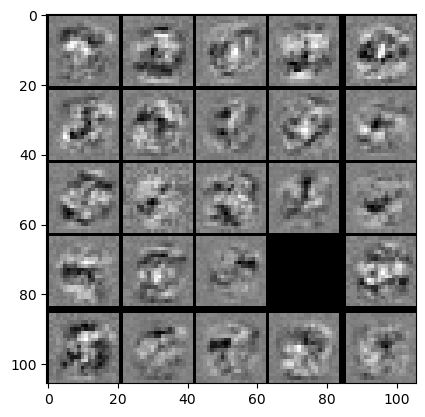

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -0.0092734 , -0.07624254, ..., -0.11021449,
        -0.02401378,  0.08681866],
       [-1.        , -0.06815839, -0.05123334, ..., -0.0150336 ,
        -0.02813996,  0.07817298],
       ...,
       [-1.        , -0.06925441, -0.08409035, ...,  0.05273568,
        -0.01718272, -0.00372601],
       [-1.        ,  0.0814612 ,  0.06432126, ...,  0.05201438,
         0.04488968,  0.02238533],
       [-1.        , -0.07512423,  0.08029286, ..., -0.05416948,
         0.041325  , -0.02182001]])

In [51]:
print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])

# input("Program paused. Press enter to continue.\n")

## ================= Part 11: Implement Predict =================
 After training the neural network, we would like to use it to predict
 the labels. You will now implement the "predict" function to use the
 neural network to predict the labels of the training set. This lets
 you compute the training set accuracy.

In [54]:
pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy:', accuracy_score(y, pred))


Training Set Accuracy: 0.9658
